<a href="https://colab.research.google.com/github/DEBISMITADEY/Soil-detection-and-crop-recommendation/blob/main/Soil_Detection_and_Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense,Dropout, Activation
from keras.layers import SimpleRNN, LSTM, Dense,GRU,Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
from scipy.stats import pearsonr
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
import io
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Soil_types.zip -d /content/drive/MyDrive/soil2

Archive:  /content/drive/MyDrive/Soil_types.zip
  inflating: /content/drive/MyDrive/soil2/Dataset/Train/Alluvial soil/01060602previewen-02b.jpg  
  inflating: /content/drive/MyDrive/soil2/Dataset/Train/Alluvial soil/01060602previewen-02d.jpg  
  inflating: /content/drive/MyDrive/soil2/Dataset/Train/Alluvial soil/1000_F_240425429_YL91trtDxXQl8L0OKP7zyngeSb63olAC.jpg  
  inflating: /content/drive/MyDrive/soil2/Dataset/Train/Alluvial soil/Alluvial-Soil..png  
  inflating: /content/drive/MyDrive/soil2/Dataset/Train/Alluvial soil/Alluvial-soil-distribution-in-India-1.jpeg  
  inflating: /content/drive/MyDrive/soil2/Dataset/Train/Alluvial soil/Alluvial-soil-distribution-in-India.jpg  
  inflating: /content/drive/MyDrive/soil2/Dataset/Train/Alluvial soil/Alluvial_1.jpg  
  inflating: /content/drive/MyDrive/soil2/Dataset/Train/Alluvial soil/Alluvial_10.png  
  inflating: /content/drive/MyDrive/soil2/Dataset/Train/Alluvial soil/Alluvial_11.jpg  
  inflating: /content/drive/MyDrive/soil2/Dataset

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/your_email/SoilData'
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
from google.colab import drive  # Assuming you've already mounted your Drive
import os
import cv2
import numpy as np

image_size = 150

labels = ['Alluvial soil', 'Black Soil', 'Clay soil', 'Red soil']

X_train = []
Y_train = []

# Define the base directory path in your Drive
base_dir = '/content/drive/MyDrive/Soil/soil2/Dataset'  # Replace if needed

# Define paths for training and testing data (lowercase 'test')
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'test')  # Lowercase 't'

# Load training data
for label in labels:
    folder_path = os.path.join(train_dir, label)

    # Handle potential errors (e.g., missing folder)
    if not os.path.exists(folder_path):
        print(f"Warning: Folder '{folder_path}' not found. Skipping...")
        continue

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

# Load testing data (similar structure)
X_test = []
Y_test = []

for label in labels:
    folder_path = os.path.join(test_dir, label)

    # Handle potential errors
    if not os.path.exists(folder_path):
        print(f"Warning: Folder '{folder_path}' not found. Skipping...")
        continue

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (image_size, image_size))
        X_test.append(img)
        Y_test.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Now you have your training and testing data in NumPy arrays (X_train, Y_train, X_test, Y_test)
# Proceed with your machine learning tasks using these arrays


In [ ]:
from google.colab import drive  # Assuming you've already mounted your Drive
import os
import cv2
import numpy as np

image_size = 150

labels = ['Alluvial soil', 'Black Soil', 'Clay soil', 'Red soil']

X_train = []
Y_train = []

# Define the base directory path in your Drive
base_dir = '/content/drive/MyDrive/Soil/soil2/Dataset'  # Replace if needed

# Define paths for training and testing data (lowercase 'test')
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'test')  # Lowercase 't'

# Load training data
for label in labels:
    folder_path = os.path.join(train_dir, label)

    # Check if folder exists
    if not os.path.exists(folder_path):
        print(f"Warning: Folder '{folder_path}' not found. Skipping...")
        continue

    # Handle empty folders (optional)
    if len(os.listdir(folder_path)) == 0:
        print(f"Warning: Folder '{folder_path}' is empty.")
        X_train.append([])  # You can append an empty array here if needed
        Y_train.append(label)
        continue

    img_list = []  # Track images loaded for each label
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:  # Check if image is loaded successfully
            img = cv2.resize(img, (image_size, image_size))
            img_list.append(img)
        Y_train.append(label)

    print(f"Loaded {len(img_list)} images for {label}")  # Print informative message

    X_train.extend(img_list)  # Add loaded images to X_train

# Load testing data (similar structure)
X_test = []
Y_test = []
# ... (rest of the code for loading test data)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Now you have your training and testing data in NumPy arrays (X_train, Y_train, X_test, Y_test)
# Proceed with your machine learning tasks using these arrays

Loaded 523 images for Alluvial soil
Loaded 228 images for Black Soil
Loaded 197 images for Clay soil
Loaded 267 images for Red soil


In [ ]:
from google.colab import drive  # Assuming you've already mounted your Drive
import os
import cv2
import numpy as np

image_size = 150

labels = ['Alluvial soil', 'Black Soil', 'Clay soil', 'Red soil']

X_train = []
Y_train = []

# Define the base directory path in your Drive
base_dir = '/content/drive/MyDrive/Soil/soil2/Dataset'  # Replace if needed

# Define paths for training and testing data (lowercase 'test')
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'test')  # Lowercase 't'

# Load training data
for label in labels:
    folder_path = os.path.join(train_dir, label)

    # Check if folder exists
    if not os.path.exists(folder_path):
        print(f"Warning: Folder '{folder_path}' not found. Skipping...")
        continue

    # Handle empty folders (optional)
    if len(os.listdir(folder_path)) == 0:
        print(f"Warning: Folder '{folder_path}' is empty.")
        continue

    img_list = []  # Track images loaded for each label
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:  # Check if image is loaded successfully
            img = cv2.resize(img, (image_size, image_size))
            img_list.append(img)
            Y_train.append(label)  # Moved this line inside the loop

    print(f"Loaded {len(img_list)} images for {label}")  # Print informative message

    X_train.extend(img_list)  # Add loaded images to X_train

# Load testing data (similar structure)
X_test = []
Y_test = []

for label in labels:
    folder_path = os.path.join(test_dir, label)

    # Check if folder exists
    if not os.path.exists(folder_path):
        print(f"Warning: Folder '{folder_path}' not found. Skipping...")
        continue

    if len(os.listdir(folder_path)) == 0:
        print(f"Warning: Folder '{folder_path}' is empty.")
        continue

    img_list = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            img_list.append(img)
            Y_test.append(label)  # Moved this line inside the loop

    print(f"Loaded {len(img_list)} images for {label}")

    X_test.extend(img_list)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Now you have your training and testing data in NumPy arrays (X_train, Y_train, X_test, Y_test)

# Calculate the percentages
total_samples = len(X_train) + len(X_test)
train_percentage = (len(X_train) / total_samples) * 100
test_percentage = (len(X_test) / total_samples) * 100

print(f"Training data percentage: {train_percentage:.2f}%")
print(f"Testing data percentage: {test_percentage:.2f}%")

# Proceed with your machine learning tasks using these arrays

Loaded 523 images for Alluvial soil
Loaded 228 images for Black Soil
Loaded 197 images for Clay soil
Loaded 267 images for Red soil
Loaded 53 images for Alluvial soil
Loaded 116 images for Black Soil
Loaded 65 images for Clay soil
Loaded 106 images for Red soil
Training data percentage: 78.14%
Testing data percentage: 21.86%


In [ ]:
Y_train

array(['Alluvial soil', 'Alluvial soil', 'Alluvial soil', ..., 'Red soil',
       'Red soil', 'Red soil'], dtype='<U13')

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(1215, 150, 150, 3)

In [ ]:
len(X_train)

1215

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
print(y_train)

['Clay soil' 'Alluvial soil' 'Alluvial soil' ... 'Alluvial soil'
 'Clay soil' 'Alluvial soil']


In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train,num_classes=4)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
    print(y_test_new)
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test,num_classes=4)

[0]
[0, 3]
[0, 3, 3]
[0, 3, 3, 1]
[0, 3, 3, 1, 3]
[0, 3, 3, 1, 3, 0]
[0, 3, 3, 1, 3, 0, 1]
[0, 3, 3, 1, 3, 0, 1, 2]
[0, 3, 3, 1, 3, 0, 1, 2, 3]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1, 3]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1, 3, 3]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1, 3, 3, 1]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1, 3, 3, 1, 0]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 0]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 0, 0]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 0, 0, 0]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 0, 0, 0, 3]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 0, 0, 0, 3, 0]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 0, 0, 0, 3, 0, 1]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0]
[0, 3, 3, 1, 3, 0, 1, 2, 3, 0, 1, 3, 3, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0]


In [ ]:
y_train

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
print(y_test)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1.

In [ ]:
pip install matplotlib

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Define the class names and corresponding folders
classes = ['Alluvial soil', 'Black Soil', 'Red soil', 'Clay soil']
base_folder = '/content/drive/MyDrive/Soil/soil2/Dataset'  # Update to match your actual path
train_folder = os.path.join(base_folder, 'Train')
output_base_folder = '/content/drive/MyDrive/Soil/soil2/Augmented_images'  # Update to match your actual path

# Function to create a folder if it does not exist
def create_folder_if_not_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

# Create ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5],
    channel_shift_range=50
)

# Function to perform augmentation and save images
def augment_and_save(input_folder, output_folder, num_augmented_images_per_input):
    create_folder_if_not_exists(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            img_path = os.path.join(input_folder, filename)
            img = load_img(img_path)  # Load the image
            x = img_to_array(img)  # Convert the image to a numpy array
            x = x.reshape((1,) + x.shape)  # Reshape the array

            # Generate and save augmented images
            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=output_folder, save_prefix='aug', save_format='jpeg'):
                i += 1
                if i >= num_augmented_images_per_input:
                    break  # Save only the specified number of augmented images per input image

# Perform augmentation for each class in the training set
for class_name in classes:
    input_folder = os.path.join(train_folder, class_name)
    output_folder = os.path.join(output_base_folder, f'aug_{class_name}')

    try:
        num_images_per_class = len(os.listdir(input_folder))
    except FileNotFoundError:
        print(f"Directory '{input_folder}' not found. Skipping augmentation for '{class_name}'.")
        continue

    # Adjust the target size and number of augmented images as needed
    target_size_per_class = 1000  # You can adjust this based on your needs
    num_augmented_images_needed = target_size_per_class - num_images_per_class
    num_augmented_images_per_input = max(1, num_augmented_images_needed // num_images_per_class)

    augment_and_save(input_folder, output_folder, num_augmented_images_per_input)

print(f"Augmented images saved in respective folders under {output_base_folder}")

Augmented images saved in respective folders under /content/drive/MyDrive/Soil/soil2/Augmented_images


In [ ]:
import os

# Define the base folder where augmented images are saved
output_base_folder = '/content/drive/MyDrive/Soil/soil2/Augmented_images'  # Replace with your actual path

# Define the class names
classes = ['Alluvial soil', 'Black Soil', 'Red soil', 'Clay soil']

# Function to count number of files in a directory
def count_files_in_directory(folder):
    if os.path.exists(folder):
        return len([name for name in os.listdir(folder) if os.path.isfile(os.path.join(folder, name))])
    else:
        return 0

# Initialize a dictionary to store counts
augmented_counts = {}

# Iterate over each class
for class_name in classes:
    output_folder = os.path.join(output_base_folder, f'aug_{class_name}')

    # Count the number of augmented images in the output folder
    num_augmented_images = count_files_in_directory(output_folder)

    # Store the count in the dictionary
    augmented_counts[class_name] = num_augmented_images

# Print the counts
for class_name, count in augmented_counts.items():
    print(f"Class: {class_name} - Number of augmented images: {count}")

Class: Alluvial soil - Number of augmented images: 1890
Class: Black Soil - Number of augmented images: 2414
Class: Red soil - Number of augmented images: 1901
Class: Clay soil - Number of augmented images: 2721


In [ ]:
import os
import shutil
import random

# Define paths
augmented_images_dir = '/content/drive/MyDrive/Soil/soil2/Augmented_images'
train_dir = os.path.join(augmented_images_dir, 'Train')
test_dir = os.path.join(augmented_images_dir, 'Test')

# Ensure directories exist or create them
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define classes (soil types)
classes = ['Alluvial soil', 'Black Soil', 'Red soil', 'Clay soil']

def split_augmented_data(source_dir, train_dir, test_dir, ratio=0.8):
    for class_name in classes:
        class_source_dir = os.path.join(source_dir, f'aug_{class_name}')
        class_train_dir = os.path.join(train_dir, class_name)
        class_test_dir = os.path.join(test_dir, class_name)

        # Create train and test directories for the current class
        os.makedirs(class_train_dir, exist_ok=True)
        os.makedirs(class_test_dir, exist_ok=True)

        # List all images in the source directory
        images = os.listdir(class_source_dir)
        random.shuffle(images)  # Shuffle images to randomize train/test split

        # Calculate split indices
        num_images = len(images)
        split_index = int(num_images * ratio)

        # Split into train and test sets
        train_images = images[:split_index]
        test_images = images[split_index:]

        # Copy images to train directory
        for img_name in train_images:
            src_path = os.path.join(class_source_dir, img_name)
            dst_path = os.path.join(class_train_dir, img_name)
            shutil.copy(src_path, dst_path)

        # Copy images to test directory
        for img_name in test_images:
            src_path = os.path.join(class_source_dir, img_name)
            dst_path = os.path.join(class_test_dir, img_name)
            shutil.copy(src_path, dst_path)

# Perform the split
split_augmented_data(augmented_images_dir, train_dir, test_dir, ratio=0.8)
print("Augmented images split into train and test sets successfully.")

Augmented images split into train and test sets successfully.


In [ ]:
import os
import shutil
import random

# Define paths
augmented_images_dir = '/content/drive/MyDrive/Soil/soil2/Augmented_images'
train_dir = os.path.join(augmented_images_dir, 'Train')
validation_dir = '/content/drive/MyDrive/Soil/soil2/Validation'

# Ensure directories exist or create them
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Define classes (soil types)
classes = ['Alluvial soil', 'Black Soil', 'Red soil', 'Clay soil']

def move_to_validation(source_dir, validation_dir, val_ratio=0.2):
    for class_name in classes:
        class_source_dir = os.path.join(source_dir, class_name)
        class_validation_dir = os.path.join(validation_dir, class_name)

        # Create validation directory for the current class if it doesn't exist
        os.makedirs(class_validation_dir, exist_ok=True)

        # List all images in the source directory
        images = os.listdir(class_source_dir)
        random.shuffle(images)  # Shuffle images to randomize the selection

        # Calculate number of images for validation set
        num_images = len(images)
        num_val_images = int(num_images * val_ratio)

        # Select images for validation set
        val_images = images[:num_val_images]

        # Copy images to validation directory
        for img_name in val_images:
            src_path = os.path.join(class_source_dir, img_name)
            dst_path = os.path.join(class_validation_dir, img_name)
            shutil.copy(src_path, dst_path)

# Perform the move to validation
move_to_validation(train_dir, validation_dir)
print("Moving 20% of the images from train to validation set completed successfully.")

Moving 20% of the images from train to validation set completed successfully.


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths and constants
dataset_dir = '/content/drive/MyDrive/Soil/soil2'
train_folder = os.path.join(dataset_dir, 'Augmented_images', 'Train')
validation_folder = os.path.join(dataset_dir, 'Validation')

# Set up data generators without augmentation for fine-tuning
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Set up data generators for training and validation
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['Alluvial soil', 'Black Soil', 'Red soil', 'Clay soil']
)

validation_generator = validation_datagen.flow_from_directory(
    validation_folder,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['Alluvial soil', 'Black Soil', 'Red soil', 'Clay soil']
)

# Continue with your model training and evaluation using these generators

Found 7139 images belonging to 4 classes.
Found 1427 images belonging to 4 classes.


In [ ]:
import os

# Define the directory where your augmented images are stored
augmented_images_dir = '/content/drive/MyDrive/Soil/soil2/Augmented_images/Train'

# Function to count number of files in a directory
def count_files(directory):
    if not os.path.exists(directory):
        return 0
    return len(os.listdir(directory))

# Count images in augmented images directory
num_augmented_images = 0
for class_name in os.listdir(augmented_images_dir):
    class_dir = os.path.join(augmented_images_dir, class_name)
    if os.path.isdir(class_dir):
        num_augmented_images += count_files(class_dir)

# Print the number of augmented images
print(f"Number of augmented images: {num_augmented_images}")


Number of augmented images: 7139


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
X_train

array([[[[ 20,  23,  47],
         [ 53,  72, 117],
         [ 26,  50,  75],
         ...,
         [124, 152, 211],
         [100, 146, 216],
         [115, 116, 182]],

        [[118, 159, 214],
         [  7,  14,  31],
         [ 80, 108, 172],
         ...,
         [ 38,  36,  74],
         [143, 174, 233],
         [ 72,  91, 150]],

        [[167, 207, 248],
         [ 21,  27,  53],
         [ 77, 114, 188],
         ...,
         [127, 151, 233],
         [119, 150, 227],
         [114, 155, 235]],

        ...,

        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1]],

        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1]],

        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  1,   1,   1],
        

In [ ]:
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths and constants
train_folder = '/content/drive/MyDrive/Soil/soil2/Augmented_images/Train'
validation_folder = '/content/drive/MyDrive/Soil/soil2/Augmented_images/Test'

# Set up data generators without augmentation for fine-tuning
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Set up data generators
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_folder,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load VGG16 base model without top layers
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

# Freeze convolutional base layers
conv_base.trainable = False

# Build the model on top of VGG16
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the top layers (which were randomly initialized)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,  # Train top layers first
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Fine-tune the entire convolutional base
conv_base.trainable = True

# Lower the learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
fine_tune_epochs = 10  # Number of epochs for fine-tuning
total_epochs = fine_tune_epochs  # Set the total number of epochs to the fine-tuning epochs

history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=total_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Optionally, save the fine-tuned model
model.save('/content/drive/MyDrive/soil2/models/vgg16_fine_tuned_model_with_dropout_bn.h5')

# Evaluate the fine-tuned model
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Validation accuracy after fine-tuning: {accuracy * 100:.2f}%')


Found 7139 images belonging to 4 classes.
Found 1787 images belonging to 4 classes.
58889256/58889256 [==============================] - 4s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               4194816   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


55/55 [==============================] - 11s 194ms/step - loss: 0.0913 - accuracy: 0.9784
Validation accuracy after fine-tuning: 97.84%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

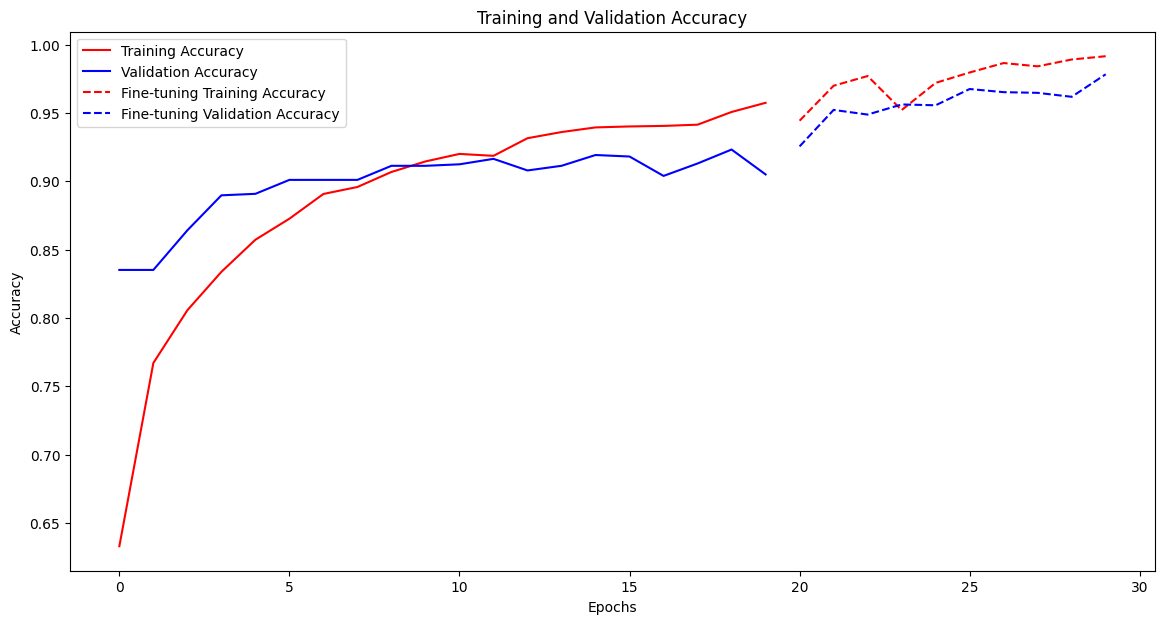

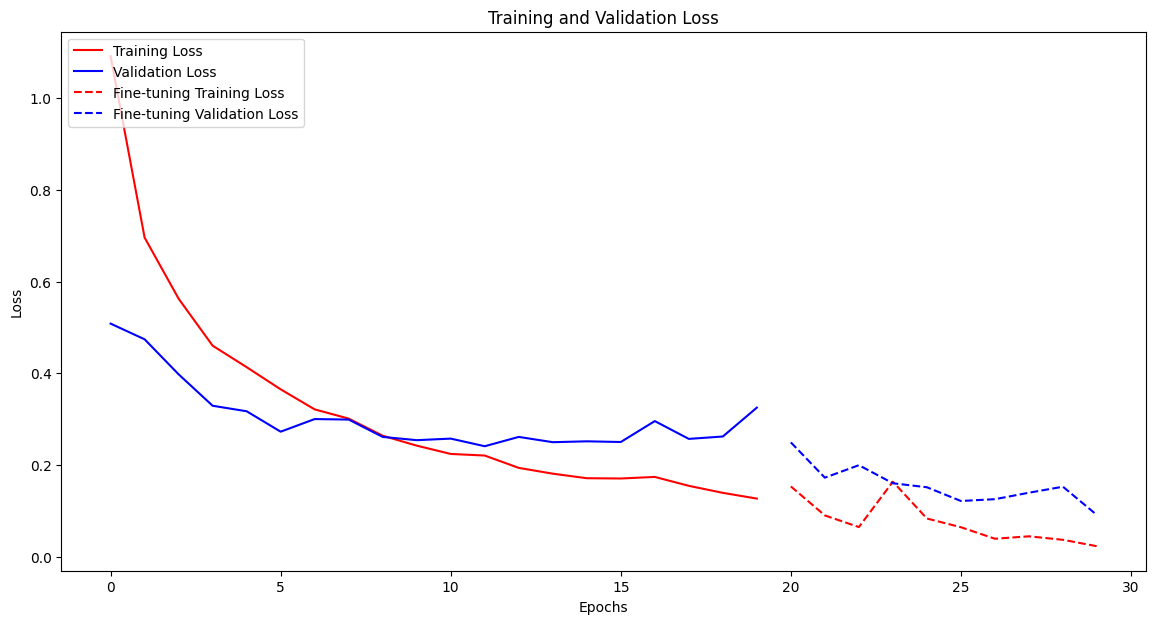

In [ ]:
import matplotlib.pyplot as plt

# Provided training history data
history = {
    'accuracy': [0.6330, 0.7671, 0.8057, 0.8338, 0.8573, 0.8727, 0.8908, 0.8959, 0.9069, 0.9146, 0.9201, 0.9187, 0.9316, 0.9361, 0.9395, 0.9402, 0.9406, 0.9415, 0.9508, 0.9575],
    'val_accuracy': [0.8352, 0.8352, 0.8642, 0.8898, 0.8909, 0.9011, 0.9011, 0.9011, 0.9114, 0.9114, 0.9125, 0.9165, 0.9080, 0.9114, 0.9193, 0.9182, 0.9040, 0.9131, 0.9233, 0.9051],
    'loss': [1.0911, 0.6959, 0.5627, 0.4603, 0.4135, 0.3652, 0.3215, 0.3014, 0.2641, 0.2425, 0.2244, 0.2209, 0.1940, 0.1814, 0.1715, 0.1709, 0.1743, 0.1549, 0.1396, 0.1271],
    'val_loss': [0.5084, 0.4742, 0.3979, 0.3294, 0.3174, 0.2729, 0.3004, 0.2993, 0.2615, 0.2544, 0.2578, 0.2412, 0.2615, 0.2500, 0.2519, 0.2504, 0.2960, 0.2572, 0.2624, 0.3253]
}

history_fine = {
    'accuracy': [0.9444, 0.9700, 0.9771, 0.9522, 0.9721, 0.9797, 0.9866, 0.9842, 0.9892, 0.9916],
    'val_accuracy': [0.9256, 0.9523, 0.9489, 0.9563, 0.9557, 0.9676, 0.9653, 0.9648, 0.9619, 0.9784],
    'loss': [0.1536, 0.0904, 0.0650, 0.1639, 0.0837, 0.0647, 0.0396, 0.0449, 0.0373, 0.0233],
    'val_loss': [0.2496, 0.1727, 0.1999, 0.1605, 0.1518, 0.1219, 0.1258, 0.1399, 0.1530, 0.0912]
}

# Plot training and validation accuracy
acc = history['accuracy']
val_acc = history['val_accuracy']
fine_tune_acc = history_fine['accuracy']
fine_tune_val_acc = history_fine['val_accuracy']

epochs = range(len(acc) + len(fine_tune_acc))

plt.figure(figsize=(14, 7))
plt.plot(range(len(acc)), acc, 'r', label="Training Accuracy")
plt.plot(range(len(acc)), val_acc, 'b', label="Validation Accuracy")
plt.plot(range(len(acc), len(acc) + len(fine_tune_acc)), fine_tune_acc, 'r--', label="Fine-tuning Training Accuracy")
plt.plot(range(len(acc), len(acc) + len(fine_tune_acc)), fine_tune_val_acc, 'b--', label="Fine-tuning Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
loss = history['loss']
val_loss = history['val_loss']
fine_tune_loss = history_fine['loss']
fine_tune_val_loss = history_fine['val_loss']

plt.figure(figsize=(14, 7))
plt.plot(range(len(loss)), loss, 'r', label="Training Loss")
plt.plot(range(len(loss)), val_loss, 'b', label="Validation Loss")
plt.plot(range(len(loss), len(loss) + len(fine_tune_loss)), fine_tune_loss, 'r--', label="Fine-tuning Training Loss")
plt.plot(range(len(loss), len(loss) + len(fine_tune_val_loss)), fine_tune_val_loss, 'b--', label="Fine-tuning Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

NameError: name 'history' is not defined

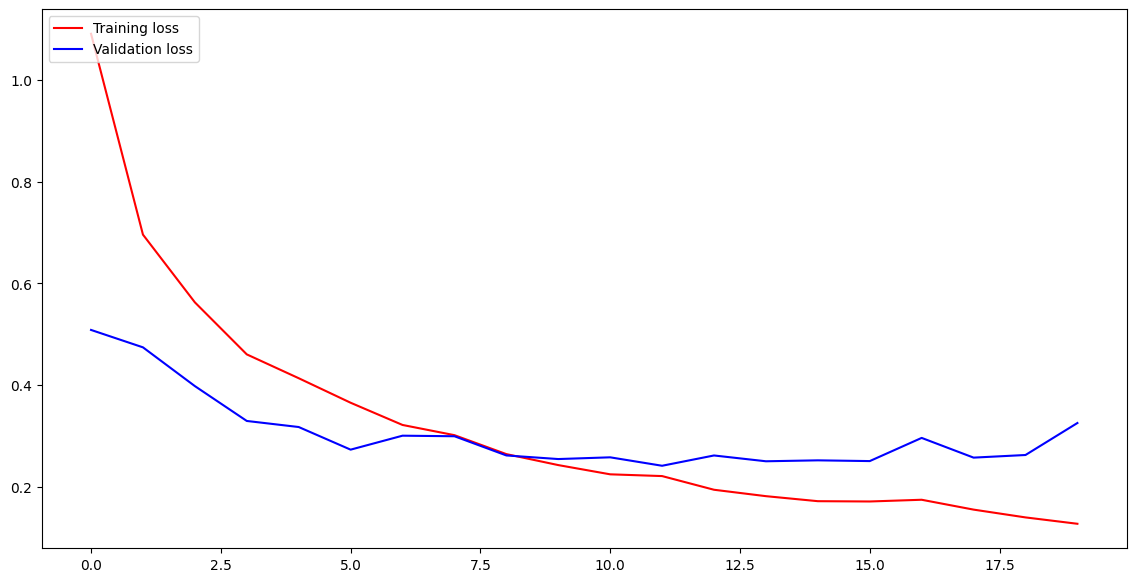

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths and constants
test_data_dir = '/content/drive/MyDrive/Soil/soil2/Augmented_images/Test'  # Path to your test images folder
batch_size = 32
image_height = 150
image_width = 150

# Load the saved VGG16 model
model_path = '/content/drive/MyDrive/soil2/models/vgg16_fine_tuned_model_with_dropout_bn.h5'
model = load_model(model_path)

# Create an instance of ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a test generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),  # Ensure this matches the input size used during training
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the same order as predictions
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size + 1)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Generate predictions for the test data
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)
print('Confusion Matrix:')
print(cm)

# Print the classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_classes, target_names=class_names)
print('Classification Report:')
print(report)

# Compute and print individual metrics
accuracy = accuracy_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes, average='weighted')
recall = recall_score(true_labels, predicted_classes, average='weighted')
f1 = f1_score(true_labels, predicted_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('



SyntaxError: unterminated string literal (detected at line 68) (<ipython-input-20-0ee5ae2c525d>, line 68)

Found 1787 images belonging to 4 classes.
56/56 [==============================] - 10s 177ms/step - loss: 0.0900 - accuracy: 0.9787
Test Loss: 0.0900
Test Accuracy: 97.87%
56/56 [==============================] - 10s 168ms/step
Confusion Matrix:
[[356   6  11   5]
 [  5 475   3   0]
 [  4   1 539   1]
 [  1   0   1 379]]
Classification Report:
               precision    recall  f1-score   support

Alluvial soil       0.97      0.94      0.96       378
   Black Soil       0.99      0.98      0.98       483
    Clay soil       0.97      0.99      0.98       545
     Red soil       0.98      0.99      0.99       381

     accuracy                           0.98      1787
    macro avg       0.98      0.98      0.98      1787
 weighted avg       0.98      0.98      0.98      1787



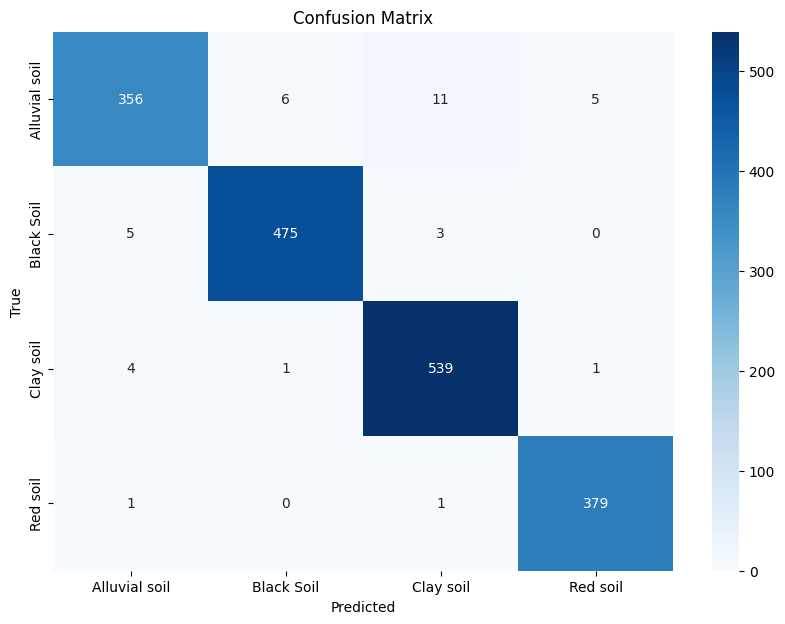

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# Define paths and constants
test_data_dir = '/content/drive/MyDrive/Soil/soil2/Augmented_images/Test'  # Path to your test images folder
batch_size = 32
image_height = 150
image_width = 150

# Load the saved VGG16 model
model_path = '/content/drive/MyDrive/soil2/models/vgg16_fine_tuned_model_with_dropout_bn.h5'
model = load_model(model_path)

# Create an instance of ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a test generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),  # Ensure this matches the input size used during training
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the same order as predictions
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size + 1)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Generate predictions for the test data
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)
print('Confusion Matrix:')
print(cm)

# Print the classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_classes, target_names=class_names)
print('Classification Report:')
print(report)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator

# Define necessary variables
test_data_dir = '/content/drive/MyDrive/Soil/soil2/Augmented_images/Test'  # Path to your test images folder
image_height = 150  # Height of the images
image_width = 150  # Width of the images
batch_size = 32  # Batch size

# Create an instance of ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a test generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,  # Directory for test data
    target_size=(image_height, image_width),  # Target size for the images
    batch_size=batch_size,
    class_mode='categorical',  # Mode of the labels
    shuffle=False  # Important for predicting to keep order
)

# Predict classes for the test set
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True classes
true_classes = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calculate test accuracy
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size + 1)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")


Found 1787 images belonging to 4 classes.
56/56 [==============================] - 10s 178ms/step
Confusion Matrix:
[[356   6  11   5]
 [  5 475   3   0]
 [  4   1 539   1]
 [  1   0   1 379]]

Classification Report:
               precision    recall  f1-score   support

Alluvial soil       0.97      0.94      0.96       378
   Black Soil       0.99      0.98      0.98       483
    Clay soil       0.97      0.99      0.98       545
     Red soil       0.98      0.99      0.99       381

     accuracy                           0.98      1787
    macro avg       0.98      0.98      0.98      1787
 weighted avg       0.98      0.98      0.98      1787

56/56 [==============================] - 10s 182ms/step - loss: 0.0900 - accuracy: 0.9787

Test Accuracy: 97.87%


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator

# Define necessary variables
test_data_dir = '/content/drive/MyDrive/Soil/soil2/Augmented_images/Test'  # Path to your test images folder
image_height = 150  # Height of the images
image_width = 150  # Width of the images
batch_size = 32  # Batch size

# Create an instance of ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a test generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,  # Directory for test data
    target_size=(image_height, image_width),  # Target size for the images
    batch_size=batch_size,
    class_mode='categorical',  # Mode of the labels
    shuffle=False  # Important for predicting to keep order
)

# Predict classes for test set
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True classes
true_classes = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Found 1787 images belonging to 4 classes.
56/56 [==============================] - 14s 250ms/step
Confusion Matrix:
[[356   6  11   5]
 [  5 475   3   0]
 [  4   1 539   1]
 [  1   0   1 379]]

Classification Report:
               precision    recall  f1-score   support

Alluvial soil       0.97      0.94      0.96       378
   Black Soil       0.99      0.98      0.98       483
    Clay soil       0.97      0.99      0.98       545
     Red soil       0.98      0.99      0.99       381

     accuracy                           0.98      1787
    macro avg       0.98      0.98      0.98      1787
 weighted avg       0.98      0.98      0.98      1787



In [ ]:
# Path to the image file
image_path = ''

# Read the image
img = cv2.imread(image_path)

# Check if the image is loaded successfully
if img is not None:
    # Resize the image
    img = cv2.resize(img, (150, 150))
    img_array = np.array(img)
    print("Image shape:", img_array.shape)
else:
    print("Error: Unable to load the image.")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


In [ ]:
image_path = 'https://drive.google.com/file/d/19KE8ULTe22TGuxzQAvOMd139V3BfIdJ1/view?usp=drive_link'


In [ ]:
from google.colab import drive
import cv2

# Mount Google Drive
drive.mount('/content/drive')

# Path to the image file
image_path = '/content/drive/My Drive/Soil/Clay_11.jpg'

# Read the image
img = cv2.imread(image_path)

# Check if the image is loaded successfully
if img is not None:
    # Resize the image
    img = cv2.resize(img, (150, 150))
    img_array = np.array(img)
    print("Image shape:", img_array.shape)
else:
    print("Error: Unable to load the image.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (150, 150, 3)


In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

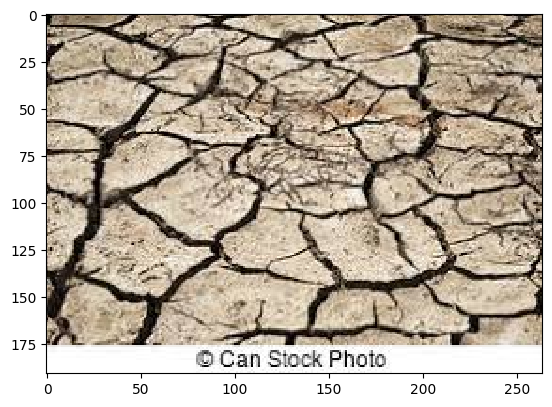

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img(image_path)
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
soil={"Alluvail soil":"{This soil is suitable for crops: Rice, SugarCane, Maize,Cotton,Soyabean,Jute}",
      "Black Soil":"{This soil is suitable for crops: Wheat, Virginia, Jowar,Millets,Linseed,Castor,Sunflower}",
      "Clay soil":"{This soil is suitable for crops: Rice, Lettuce, Chard,Broccoli,Cabbage,Snap,Beans}",
      "Red soil":"{This soil is suitable for crops: Cotton, Pulses, Millets,OilSeeds,Potatoes}",

}

if labels[indices] in soil.keys():
    print("Soil Type:",labels[indices])
    print(soil[labels[indices]])

1/1 [==============================] - 0s 28ms/step
Soil Type: Clay soil
{This soil is suitable for crops: Rice, Lettuce, Chard,Broccoli,Cabbage,Snap,Beans}


In [ ]:
from google.colab import drive
import cv2

# Mount Google Drive
drive.mount('/content/drive')

# Path to the image file
image_path = '/content/drive/My Drive/Soil/Black_17.jpg'

# Read the image
img = cv2.imread(image_path)

# Check if the image is loaded successfully
if img is not None:
    # Resize the image
    img = cv2.resize(img, (150, 150))
    img_array = np.array(img)
    print("Image shape:", img_array.shape)
else:
    print("Error: Unable to load the image.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image shape: (150, 150, 3)


In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

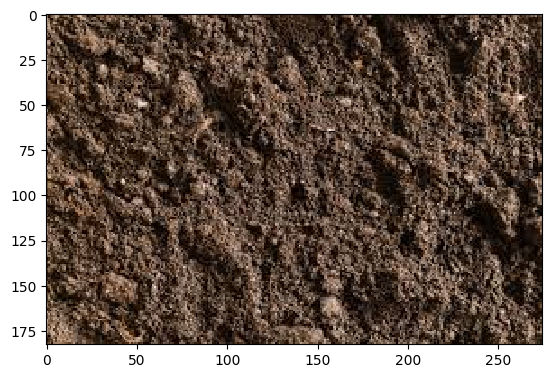

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img(image_path)
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
soil={"Alluvail soil":"{This soil is suitable for crops: Rice, SugarCane, Maize,Cotton,Soyabean,Jute}",
      "Black Soil":"{This soil is suitable for crops: Wheat, Virginia, Jowar,Millets,Linseed,Castor,Sunflower}",
      "Clay soil":"{This soil is suitable for crops: Rice, Lettuce, Chard,Broccoli,Cabbage,Snap,Beans}",
      "Red soil":"{This soil is suitable for crops: Cotton, Pulses, Millets,OilSeeds,Potatoes}",

}

if labels[indices] in soil.keys():
    print("Soil Type:",labels[indices])
    print(soil[labels[indices]])

1/1 [==============================] - 0s 27ms/step
Soil Type: Clay soil
{This soil is suitable for crops: Rice, Lettuce, Chard,Broccoli,Cabbage,Snap,Beans}


In [ ]:
import os
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths and constants
train_folder = '/content/drive/MyDrive/Soil/soil2/Augmented_images/Train'
validation_folder = '/content/drive/MyDrive/Soil/soil2/Augmented_images/Test'

# Set up data generators without augmentation for fine-tuning
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Set up data generators
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(299, 299),  # InceptionV3 input size is (299, 299)
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_folder,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load InceptionV3 base model without top layers
conv_base = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(299, 299, 3)
)

# Freeze convolutional base layers
conv_base.trainable = False

# Build the model on top of InceptionV3
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the top layers (which were randomly initialized)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,  # Train top layers first
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Fine-tune the entire convolutional base
conv_base.trainable = True

# Lower the learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
fine_tune_epochs = 10  # Number of epochs for fine-tuning
total_epochs = fine_tune_epochs  # Set the total number of epochs to the fine-tuning epochs

history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=total_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Optionally, save the fine-tuned model
model.save('/content/drive/MyDrive/soil2/models/inceptionv3_fine_tuned_model_with_dropout_bn.h5')

# Evaluate the fine-tuned model
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Validation accuracy after fine-tuning: {accuracy * 100:.2f}%')

Found 7139 images belonging to 4 classes.
Found 1787 images belonging to 4 classes.
87910968/87910968 [==============================] - 5s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_6 (Dense)             (None, 512)               67109376  
                                                                 
 batch_normalization_96 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


55/55 [==============================] - 16s 283ms/step - loss: 0.0645 - accuracy: 0.9778
Validation accuracy after fine-tuning: 97.78%


In [ ]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths and constants
test_folder = '/content/drive/MyDrive/Soil/soil2/Augmented_images/Test'  # Path to your test images folder
batch_size = 32

# Load the fine-tuned model
model_path = '/content/drive/MyDrive/soil2/models/inceptionv3_fine_tuned_model_with_dropout_bn.h5'
model = load_model(model_path)

# Create an instance of ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a test generator
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(299, 299),  # Should match the input size used during training
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the same order as predictions
)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

# Print the test accuracy
print(f'Test accuracy: {accuracy * 100:.2f}%')


Found 1787 images belonging to 4 classes.
55/55 [==============================] - 16s 264ms/step - loss: 0.0640 - accuracy: 0.9784
Test accuracy: 97.84%


Found 1787 images belonging to 4 classes.
56/56 [==============================] - 15s 244ms/step - loss: 0.0636 - accuracy: 0.9782
Test Loss: 0.0636
Test Accuracy: 97.82%
56/56 [==============================] - 16s 266ms/step
Confusion Matrix:
[[353   7   9   9]
 [  2 480   1   0]
 [  6   0 538   1]
 [  3   0   1 377]]
Classification Report:
               precision    recall  f1-score   support

Alluvial soil       0.97      0.93      0.95       378
   Black Soil       0.99      0.99      0.99       483
    Clay soil       0.98      0.99      0.98       545
     Red soil       0.97      0.99      0.98       381

     accuracy                           0.98      1787
    macro avg       0.98      0.98      0.98      1787
 weighted avg       0.98      0.98      0.98      1787



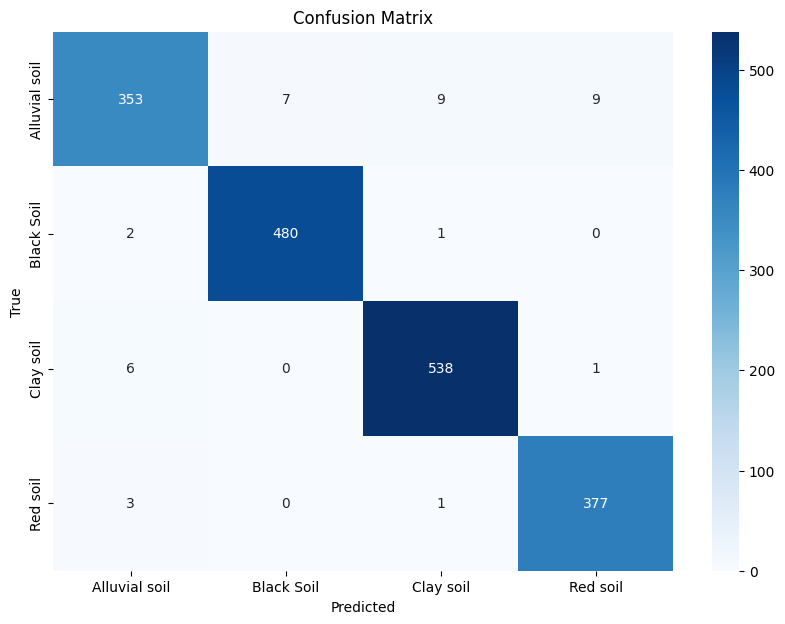

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3

# Define paths and constants
test_data_dir = '/content/drive/MyDrive/Soil/soil2/Augmented_images/Test'  # Path to your test images folder
batch_size = 32
image_height = 299
image_width = 299

# Load the saved InceptionV3 model
model_path = '/content/drive/MyDrive/soil2/models/inceptionv3_fine_tuned_model_with_dropout_bn.h5'
model = load_model(model_path)

# Create an instance of ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a test generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),  # Ensure this matches the input size used during training
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the same order as predictions
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size + 1)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Generate predictions for the test data
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)
print('Confusion Matrix:')
print(cm)

# Print the classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_classes, target_names=class_names)
print('Classification Report:')
print(report)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


56/56 [==============================] - 21s 343ms/step


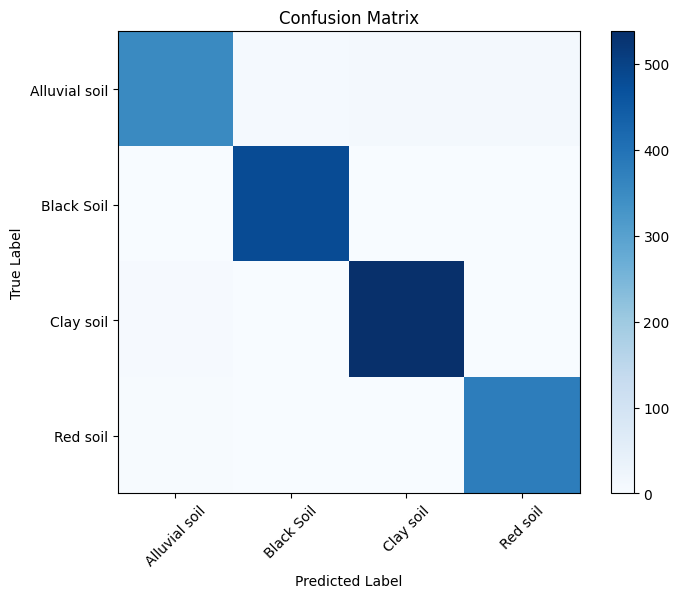

Classification Report:
               precision    recall  f1-score   support

Alluvial soil       0.97      0.93      0.95       378
   Black Soil       0.99      0.99      0.99       483
    Clay soil       0.98      0.99      0.98       545
     Red soil       0.97      0.99      0.98       381

     accuracy                           0.98      1787
    macro avg       0.98      0.98      0.98      1787
 weighted avg       0.98      0.98      0.98      1787



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predictions
true_labels = test_generator.classes
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the confusion matrix
plt.show()

# Display the classification report
print('Classification Report:')
class_names = list(test_generator.class_indices.keys())
print(classification_report(true_labels, predicted_classes, target_names=class_names))


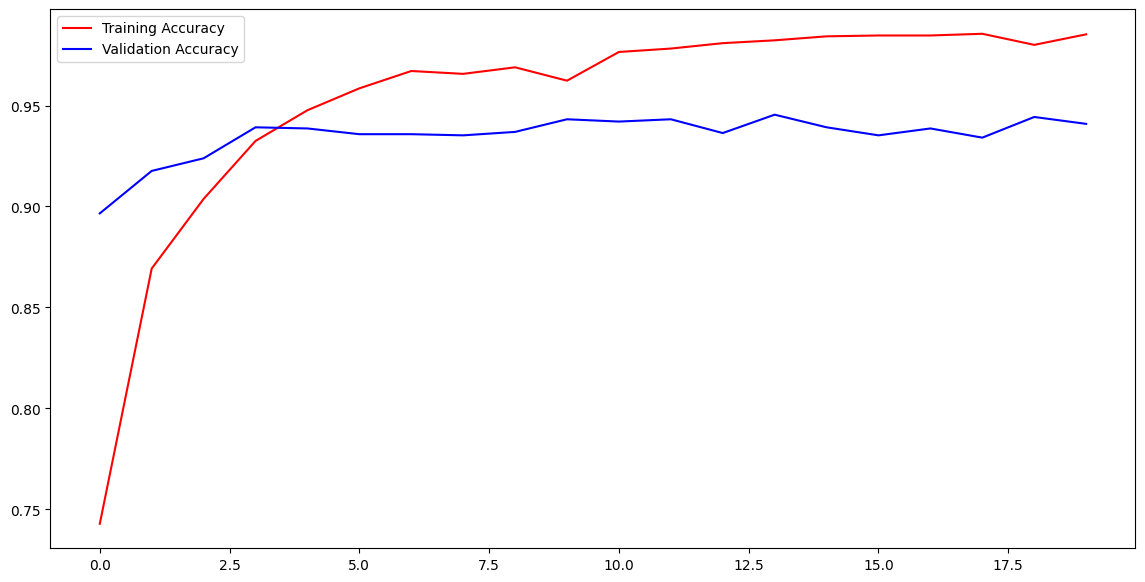

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

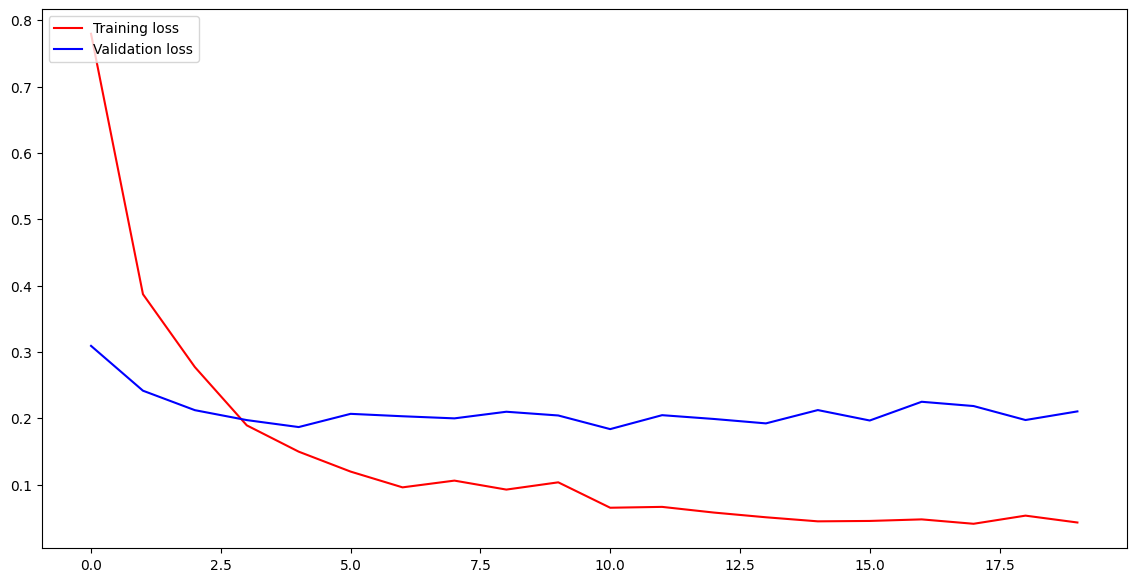

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential

# Define paths and constants
train_folder = '/content/drive/MyDrive/Soil/soil2/Augmented_images/Train'
validation_folder = '/content/drive/MyDrive/Soil/soil2/Augmented_images/Test'

# Set up data generators without augmentation for fine-tuning
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Set up data generators
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224, 224),  # ResNet50 input size is (224, 224)
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_folder,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load ResNet50 base model without top layers from TensorFlow Hub
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Build the model on top of ResNet50
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the top layers (which were randomly initialized)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Train top layers first
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Fine-tune the entire convolutional base
base_model.trainable = True

# Lower the learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
fine_tune_epochs = 10  # Number of epochs for fine-tuning
total_epochs = fine_tune_epochs  # Set the total number of epochs to the fine-tuning epochs

history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=total_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Optionally, save the fine-tuned model
model.save('/content/drive/MyDrive/soil2/models/resnet50_fine_tuned_model_with_dropout_bn.h5')

# Evaluate the fine-tuned model
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Validation accuracy after fine-tuning: {accuracy * 100:.2f}%')


Found 7139 images belonging to 4 classes.
Found 1787 images belonging to 4 classes.
94765736/94765736 [==============================] - 5s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_9 (Dense)             (None, 512)               51380736  
                                                                 
 batch_normalization_98 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


55/55 [==============================] - 12s 214ms/step - loss: 0.0928 - accuracy: 0.9631
Validation accuracy after fine-tuning: 96.31%


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths and constants
test_data_dir = '/content/drive/MyDrive/Soil/soil2/Augmented_images/Test'  # Path to your test images folder
batch_size = 32

# Load the saved ResNet model
resnet_model_path = '/content/drive/MyDrive/soil2/models/resnet50_fine_tuned_model_with_dropout_bn.h5'
resnet_model = load_model(resnet_model_path)

# Create an instance of ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a test generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),  # Ensure this matches the input size of your model
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the same order as predictions
)

# Evaluate the model on the test data
resnet_loss, resnet_accuracy = resnet_model.evaluate(test_generator, verbose=1)

# Print the test accuracy
print(f'ResNet Test Accuracy: {resnet_accuracy * 100:.2f}%')


Found 1787 images belonging to 4 classes.
56/56 [==============================] - 15s 233ms/step - loss: 0.0928 - accuracy: 0.9625
ResNet Test Accuracy: 96.25%


In [ ]:
model_path = '//content/drive/MyDrive/soil2/models/resnet50_fine_tuned_model_with_dropout_bn.h5'
model = load_model(model_path)


In [ ]:
# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Print classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_classes, target_names=class_names)
print(report)

# Compute individual metrics
accuracy = np.mean(true_labels == predicted_classes)
precision = np.mean(np.diag(cm) / np.sum(cm, axis=0))
recall = np.mean(np.diag(cm) / np.sum(cm, axis=1))
f1_score = 2 * precision * recall / (precision + recall)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

               precision    recall  f1-score   support

Alluvial soil       0.97      0.93      0.95       378
   Black Soil       0.99      0.99      0.99       483
    Clay soil       0.98      0.99      0.98       545
     Red soil       0.97      0.99      0.98       381

     accuracy                           0.98      1787
    macro avg       0.98      0.98      0.98      1787
 weighted avg       0.98      0.98      0.98      1787

Accuracy: 0.9782
Precision: 0.9774
Recall: 0.9761
F1 Score: 0.9767


Found 340 images belonging to 4 classes.
11/11 [==============================] - 76s 7s/step - loss: 0.1160 - accuracy: 0.9588
Test accuracy: 95.88%
11/11 [==============================] - 72s 6s/step


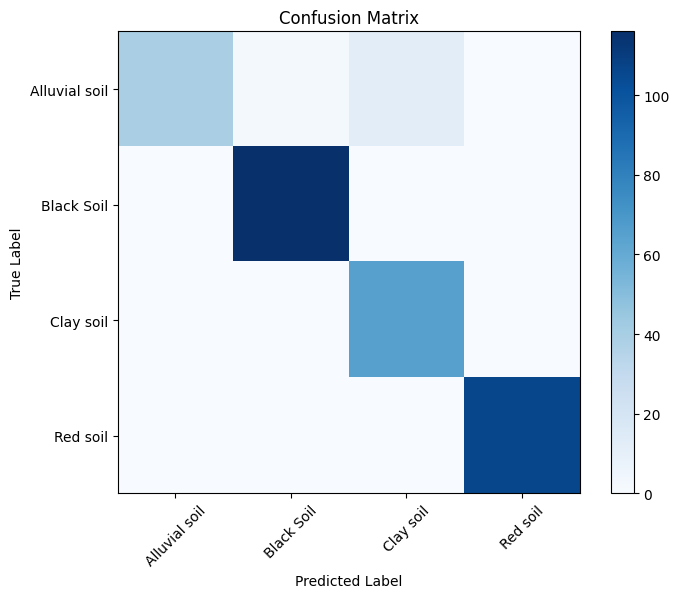

Classification Report:
               precision    recall  f1-score   support

Alluvial soil       1.00      0.74      0.85        53
   Black Soil       0.98      1.00      0.99       116
    Clay soil       0.84      1.00      0.92        65
     Red soil       1.00      1.00      1.00       106

     accuracy                           0.96       340
    macro avg       0.96      0.93      0.94       340
 weighted avg       0.96      0.96      0.96       340

Accuracy: 0.9588
Precision: 0.9644
Recall: 0.9588
F1 Score: 0.9572


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths and constants
test_data_dir = '/content/drive/MyDrive/Soil/soil2/Dataset/test'  # Path to your original test images folder
batch_size = 32

# Load the saved ResNet50 model
model_path = '//content/drive/MyDrive/soil2/models/resnet50_fine_tuned_model_with_dropout_bn.h5'
model = load_model(model_path)

# Create an instance of ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a test generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),  # Should match the input size used during training
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the same order as predictions
)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size + 1)

# Print the test accuracy
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Generate predictions for the test data
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Display confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Display classification report
class_names = list(test_generator.class_indices.keys())
print('Classification Report:')
print(classification_report(true_labels, predicted_classes, target_names=class_names))

# Compute and print individual metrics
accuracy = accuracy_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes, average='weighted')
recall = recall_score(true_labels, predicted_classes, average='weighted')
f1 = f1_score(true_labels, predicted_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the fine-tuned ResNet50 model
model_path = '/content/drive/MyDrive/soil2/models/resnet50_fine_tuned_model_with_dropout_bn.h5'
model = load_model(model_path)

# Function to predict soil type from an input image
def predict_soil_type_from_image(input_image_path, model):
    img = image.load_img(input_image_path, target_size=(224, 224))  # Ensure this matches the input size used during training
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize the image

    # Make prediction
    predictions = model.predict(x)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Decode prediction
    if predicted_class == 0:
        return 'alluvial'
    elif predicted_class == 1:
        return 'clay'
    elif predicted_class == 2:
        return 'red'
    elif predicted_class == 3:
        return 'black'
    else:
        return 'Unknown'

# Example usage:
input_image_path = '/content/drive/My Drive/Soil/Black_17.jpg'
predicted_soil_type = predict_soil_type_from_image(input_image_path, model)
print(f'Predicted Soil Type: {predicted_soil_type}')


1/1 [==============================] - 2s 2s/step
Predicted Soil Type: clay


In [ ]:
!unzip /content/drive/MyDrive/Crop_recomm.zip -d /content/drive/MyDrive/soil3

Archive:  /content/drive/MyDrive/Crop_recomm.zip
replace /content/drive/MyDrive/soil3/Crop_recommendation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/soil3/Crop_recommendation.csv  


In [ ]:
import pandas as pd

# Example: Load a CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/soil3/Crop_recommendation.csv')
# Display the first few rows of the DataFrame
print(df.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.dtypes


N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
print(df.label.unique())
print("Total unique values in Label columns are: ",len(df.label.unique()))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Total unique values in Label columns are:  22


In [ ]:
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
X = df.drop(["label"], axis = 1)
y = pd.DataFrame(df.label)
print(X.shape)
print(y.shape)

(2200, 7)
(2200, 1)


In [ ]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [ ]:
from keras.utils import to_categorical

In [ ]:
l_encode = LabelEncoder()
l_encode.fit(y)
y = l_encode.transform(y)
print(y)
y = to_categorical(y)
y

[20 20 20 ...  5  5  5]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in X.columns:
            x = np.array(X[col]).reshape(-1,1)
            X[col]=scaler.fit_transform(x)

In [ ]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


In [ ]:
#Splitting training data and testing data using train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42, test_size=0.2)

In [ ]:
encoding=['rice' ,'maize', 'chickpea', 'kidneybeans', 'pigeonpeas' ,'mothbeans',
 'mungbean', 'blackgram','lentil' ,'pomegranate', 'banana' ,'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange' ,'papaya', 'coconut', 'cotton',
 'jute', 'coffee']

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
## Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout#regularization

In [ ]:
classifier=Sequential()

In [ ]:
## Adding the input layers
classifier.add(Dense(units=7))

In [ ]:
# Adding the 1st hidden layer
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.2))

# Adding the 2nd hidden layer
classifier.add(Dense(units=28, activation='relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units=22, activation='softmax'))


In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=9,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in X.columns:
            x = np.array(X[col]).reshape(-1,1)
            X[col]=scaler.fit_transform(x)

In [ ]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42, test_size=0.2)

In [ ]:
df.shape

(2200, 8)

In [ ]:
#describing all the numeric columns in the table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Nitrogen,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
Phosphorous,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
Pottasium,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [ ]:
#describing all the non-numeric columns
df.describe(exclude=np.number).T

,count,unique,top,freq
label,2200,22,rice,100


In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.rename(columns={'N':'Nitrogen'},inplace=True)
df.rename(columns={'P':'Phosphorous'},inplace=True)
df.rename(columns={'K':'Pottasium'},inplace=True)

In [ ]:
df.head()

,Nitrogen,Phosphorous,Pottasium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


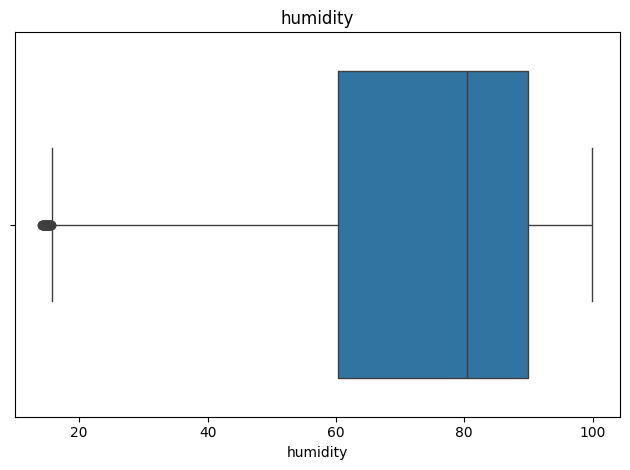

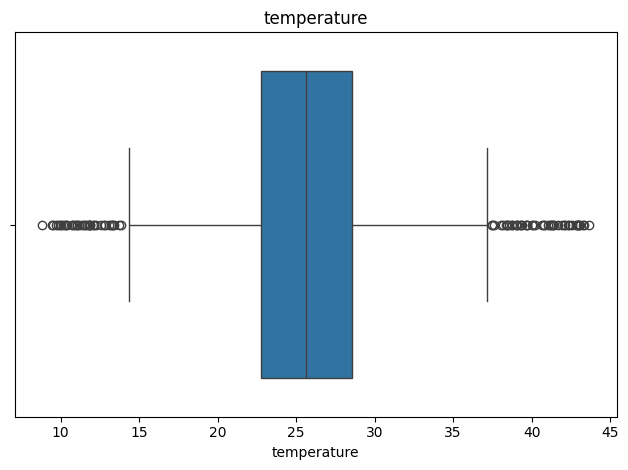

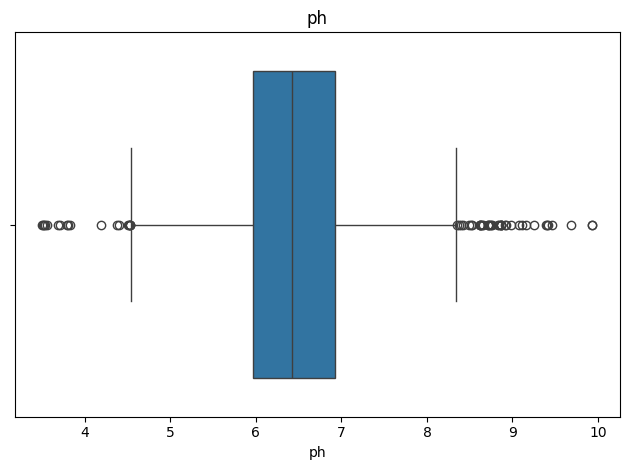

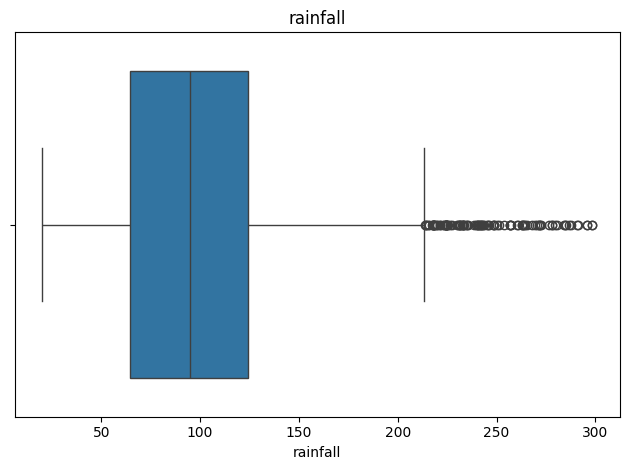

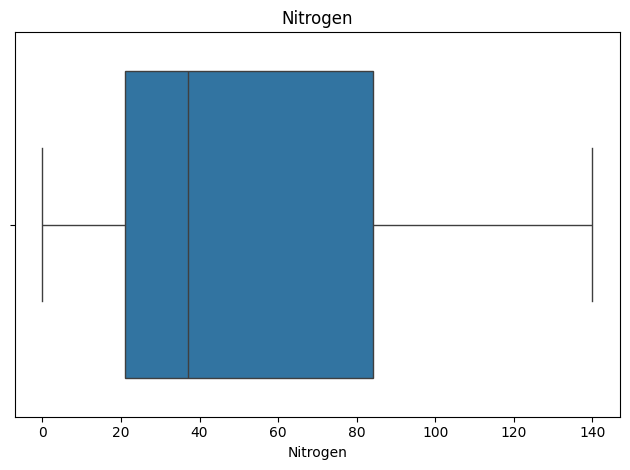

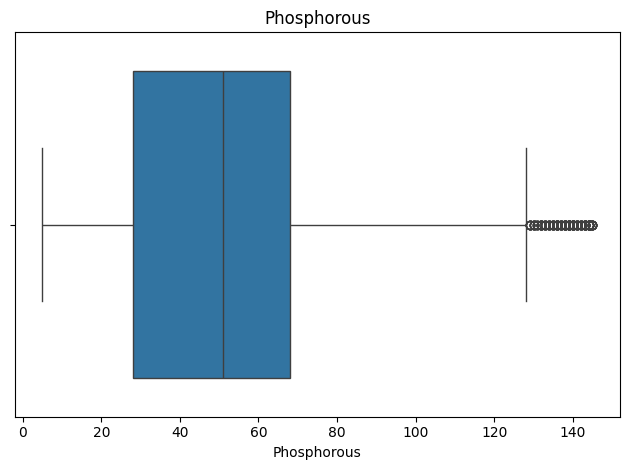

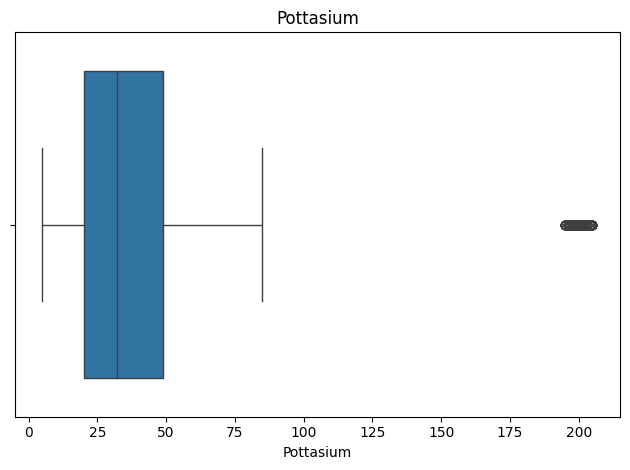

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

column_name=['humidity','temperature','ph','rainfall','Nitrogen','Phosphorous','Pottasium']
for i in column_name:
    sns.boxplot(data=df, x=i)
    plt.title(i)
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

# Load the dataset
dataset_path = '/content/drive/MyDrive/soil3/Crop_recommendation.csv'
data = pd.read_csv(dataset_path)
print(data.head())



    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
import pandas as pd

# Load the dataset
dataset_path = '/content/drive/MyDrive/soil3/Crop_recommendation.csv'
data = pd.read_csv(dataset_path)

# Print the first few rows of the dataframe and its columns
print(data.head())
print(data.columns)



    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Use the actual column names from the dataset
feature_columns = ['humidity', 'temperature', 'ph', 'rainfall', 'N', 'P', 'K']
features = data[feature_columns]

# Normalize or scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
from keras.utils import to_categorical

In [ ]:
l_encode = LabelEncoder()
l_encode.fit(y)
y = l_encode.transform(y)
print(y)
y = to_categorical(y)
y

ValueError: y should be a 1d array, got an array of shape (2200, 22) instead.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

# Load your dataset
dataset_path = '/content/drive/MyDrive/soil3/Crop_recommendation.csv'
data = pd.read_csv(dataset_path)

# Preprocessing your dataset
# Select feature columns
feature_columns = ['humidity', 'temperature', 'ph', 'rainfall', 'N', 'P', 'K']  # Adjust column names as per your dataset
X = data[feature_columns].values
y = data['label'].values

# Encode categorical labels
l_encode = LabelEncoder()
y = l_encode.fit_transform(y)
y = to_categorical(y)

# Normalize or scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Load your pretrained CNN model (VGG16, for example)
vgg_model_path = '/content/drive/MyDrive/soil2/models/vgg16_fine_tuned_model_with_dropout_bn.h5'
vgg_model = load_model(vgg_model_path)

# Assuming you have features extracted from VGG16
X_train_features = vgg_model.predict(X_train)
X_test_features = vgg_model.predict(X_test)

# Initialize ANN
classifier = Sequential()

# Add layers to your ANN
classifier.add(Flatten(input_shape=(X_train_features.shape[1],)))  # Flatten or use other pooling layers

# Adding the 1st hidden layer
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.2))

# Adding the 2nd hidden layer
classifier.add(Dense(units=28, activation='relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units=len(l_encode.classes_), activation='softmax'))  # Adjust units for your output dimension

# Compile the ANN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train your ANN with features extracted from CNN
history = classifier.fit(X_train_features, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Evaluate the ANN
loss, accuracy = classifier.evaluate(X_test_features, y_test)
print(f'Test Accuracy: {accuracy}')

# Save your ANN model
ann_model_path = '/content/drive/MyDrive/soil2/models/ANN_model.h5'
classifier.save(ann_model_path)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 150, 150, 3), found shape=(32, 7)


In [ ]:
# Load your pretrained VGG16 model
vgg_model_path = '/content/drive/MyDrive/soil2/models/vgg16_fine_tuned_model_with_dropout_bn.h5'
vgg_model = load_model(vgg_model_path)


In [ ]:
# Load your pretrained VGG16 model
vgg_model_path = '/content/drive/MyDrive/soil2/models/vgg16_fine_tuned_model_with_dropout_bn.h5'
vgg_model = load_model(vgg_model_path)

# Assuming input shape of VGG16 model (adjust according to your model's input shape)
input_shape = (150, 150, 3)



In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=9,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [ ]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=15,callbacks=early_stopping)


Epoch 1/15
176/176 [==============================] - 1s 3ms/step - loss: 0.5957 - accuracy: 0.7807 - val_loss: 0.3633 - val_accuracy: 0.8250
Epoch 2/15
176/176 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8369 - val_loss: 0.2001 - val_accuracy: 0.9455
Epoch 3/15
176/176 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8847 - val_loss: 0.1432 - val_accuracy: 0.9477
Epoch 4/15
176/176 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8830 - val_loss: 0.1835 - val_accuracy: 0.9386
Epoch 5/15
176/176 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9165 - val_loss: 0.2562 - val_accuracy: 0.9023
Epoch 6/15
176/176 [==============================] - 0s 2ms/step - loss: 0.2383 - accuracy: 0.9165 - val_loss: 0.1729 - val_accuracy: 0.9341
Epoch 7/15
176/176 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.9148 - val_loss: 0.1847 - val_accuracy: 0.9386
Epoch 

In [ ]:
newdata=classifier.predict([[90, 90, 43, 20.879744, 75, 5.5,220]])
print(newdata)
result=np.argmax(newdata)
print(encoding[result])

1/1 [==============================] - 0s 34ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
blackgram


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load your dataset
dataset_path = '/content/drive/MyDrive/soil3/Crop_recommendation.csv'
data = pd.read_csv(dataset_path)

# Select feature columns
feature_columns = ['humidity', 'temperature', 'ph', 'rainfall', 'N', 'P', 'K']
X = data[feature_columns].values
y = data['label'].values

# Encode categorical labels
l_encode = LabelEncoder()
y = l_encode.fit_transform(y)
y = to_categorical(y)

# Normalize or scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize ANN
classifier = Sequential()

# Adding the 1st hidden layer
classifier.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
classifier.add(Dropout(0.2))

# Adding the 2nd hidden layer
classifier.add(Dense(units=28, activation='relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units=len(np.unique(data['label'])), activation='softmax'))  # Adjust units for your output dimension

# Compile the ANN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train your ANN
history = classifier.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Evaluate the ANN
loss, accuracy = classifier.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Save your ANN model
ann_model_path = '/content/drive/MyDrive/soil2/models/ann_model.h5'
classifier.save(ann_model_path)


Epoch 1/10
44/44 [==============================] - 1s 8ms/step - loss: 2.9638 - accuracy: 0.1080 - val_loss: 2.7662 - val_accuracy: 0.2500
Epoch 2/10
44/44 [==============================] - 0s 3ms/step - loss: 2.5721 - accuracy: 0.3004 - val_loss: 2.3039 - val_accuracy: 0.4460
Epoch 3/10
44/44 [==============================] - 0s 3ms/step - loss: 2.0835 - accuracy: 0.4375 - val_loss: 1.7487 - val_accuracy: 0.6080
Epoch 4/10
44/44 [==============================] - 0s 3ms/step - loss: 1.6189 - accuracy: 0.5433 - val_loss: 1.2773 - val_accuracy: 0.7131
Epoch 5/10
44/44 [==============================] - 0s 3ms/step - loss: 1.3150 - accuracy: 0.6058 - val_loss: 0.9622 - val_accuracy: 0.7898
Epoch 6/10
44/44 [==============================] - 0s 3ms/step - loss: 1.0671 - accuracy: 0.6662 - val_loss: 0.7540 - val_accuracy: 0.8068
Epoch 7/10
44/44 [==============================] - 0s 4ms/step - loss: 0.8985 - accuracy: 0.7124 - val_loss: 0.6125 - val_accuracy: 0.8523
Epoch 8/10
44/44 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate the ANN on test data
loss, accuracy = classifier.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')


14/14 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8932
Test Accuracy: 0.8931818008422852
